# Blood type simulation
-------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We first bring about the initial genotype population assuming theres is a frequency p = [p0, p1, p3] in the population of the alleles [O, A, B] respectively. Any genotype element is pair of two alleles. The phenotypical characteristic (blood type) of a given individual depends on the individual genotype according to the rule:

| Genotype|Blood type|  
|---------|:------:|
|[0,0]|0|
|[0,1]|1|
|[1,0]|1|
|[1,1]|1|
|[0,2]|2|
|[2,0]|2|
|[2,2]|2|
|[1,2]|3|
|[2,1]|3|


In the above table the alleles  O,A,B  are identifyed with 0,1,2 respectively whereas the blood types O,A,B, AB respectively correspond to 0,1,2,3.

More details in [Wikipedia](https://en.wikipedia.org/wiki/Blood_type)

In [13]:
np.random.seed(13481)
popul= 15
init_genotype = [np.random.choice(3, 2, p=[0.65, 0.15, 0.2]) for i in range(2*(popul//2))]

In [14]:
def blood_type(gen): 
    if gen[0]+gen[1] == 3: return 3
    else: return max(gen)

To keep it simple,  we allow randomly pairing of any two different individuals. 

In [15]:
def pop_random(lst):
    idx = np.random.choice(len(lst))
    return lst.pop(idx)

def couples(popul):
    copy_list = list(popul)
    if (len(popul)%2==1): copy_list=copy_list[1:]
    pairs = []
    while copy_list:
        rand1 = pop_random(copy_list)
        rand2 = pop_random(copy_list)
        pair = rand1, rand2
        pairs.append(pair)
    return pairs

Each parent (mother and father) provides exactly one randomly chosen allele from its genotype to build up the genotype of the child.

In [16]:
def child(pair):
    mth, fth = pair[0], pair[1]
    e = np.random.choice(2,2)
    return [mth[e[0]], fth[e[1]]]

def new_generation(popul):
    children = [child(x) for x in couples(popul)]
    return children + popul

In [17]:
def nth_generation(n, init_popul):
    k = 0
    popul = init_popul
    while k < n: 
        popul = new_generation(popul)
        k = k+1
    return popul   

In [18]:
generation25 = nth_generation(25, init_genotype)
len(generation25)

340462

## Dynamical analysis

In [19]:
n = 25
data = []
k = 0
popul = init_genotype
fenotype = [blood_type(x) for x in popul]
hist, bin_edges = np.histogram(fenotype,bins = 4)
hist = hist/len(fenotype)
data.append(hist)
while k < n: 
        popul = new_generation(popul)
        fenotype = [blood_type(x) for x in popul]
        hist, bin_edges = np.histogram(fenotype,bins = 4)
        hist = hist/len(fenotype)
        data.append(hist)
        k = k+1 

In [20]:
O_type = [list(x) for x in zip(*data)][0]
A_type = [list(x) for x in zip(*data)][1]
B_type = [list(x) for x in zip(*data)][2]
AB_type = [list(x) for x in zip(*data)][3]

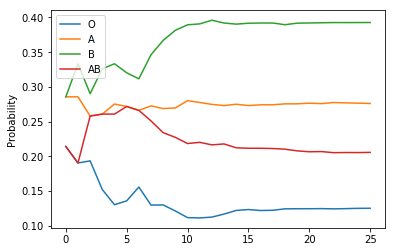

In [21]:
plt.plot(O_type, label='O')
plt.plot(A_type, label='A')
plt.plot(B_type, label='B')
plt.plot(AB_type, label='AB')
plt.ylabel('Probability')
plt.legend()
plt.show()

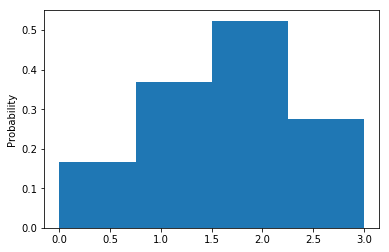

In [22]:
plt.hist(fenotype, normed=True, bins=4)
plt.ylabel('Probability')
plt.show()